# Motor data analysis

In [1]:
# Run to install PySerial library
#!conda install -c conda-forge pyserial

In [2]:
# Read the serial port and save to a csv (not working properly)
"""
import pandas as pd
import serial, time

file_name = 'motors_openLoop_noCharge1.csv'
ser=serial.Serial("/dev/ttyACM0",9600)

data = {'Time':list(),
        'Vel1':list(),'Vel2':list(),
        'SP1':list(),'SP2':list(),
        'Out1':list(),'Out2':list()}

while True:
    time.sleep(0.1)
    print("Waiting for messages from arduino..");
    read_ser=ser.readline().decode("utf-8")
    print(read_ser)
    
    read_list = read_ser.split(",")
    if len(read_list)==1:
        if(read_ser == "123456"):
            ser.close()
            new_data = pd.DataFrame(data=data, index='Time')
            new_data.to_csv(path_or_buf=file_name)
    else:
        i = -1
        for k in data.keys():
            i+=1
            data[k].append(read_list[i])
"""

'\nimport pandas as pd\nimport serial, time\n\nfile_name = \'motors_openLoop_noCharge1.csv\'\nser=serial.Serial("/dev/ttyACM0",9600)\n\ndata = {\'Time\':list(),\n        \'Vel1\':list(),\'Vel2\':list(),\n        \'SP1\':list(),\'SP2\':list(),\n        \'Out1\':list(),\'Out2\':list()}\n\nwhile True:\n    time.sleep(0.1)\n    print("Waiting for messages from arduino..");\n    read_ser=ser.readline().decode("utf-8")\n    print(read_ser)\n    \n    read_list = read_ser.split(",")\n    if len(read_list)==1:\n        if(read_ser == "123456"):\n            ser.close()\n            new_data = pd.DataFrame(data=data, index=\'Time\')\n            new_data.to_csv(path_or_buf=file_name)\n    else:\n        i = -1\n        for k in data.keys():\n            i+=1\n            data[k].append(read_list[i])\n'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from IPython.display import display
pd.options.display.max_columns = 10#None
pd.options.display.max_rows = 10
import os

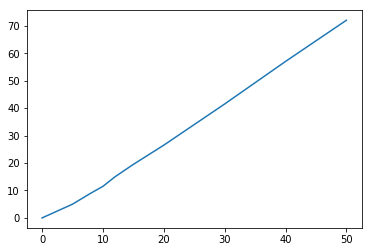

In [4]:
p = [0,5,8,10,12,15,20,30,40,50] # [%]
v = [0,5,9,11.5,15,19.5,26.5,41.5,57,72] # [rad/s]
plt.plot(p,v)

### Open loop

In [5]:
file_name = 'motors_openLoop_noCharge_181020_2.csv'

raw_data = pd.read_csv(file_name)
raw_data['Time'] = pd.to_datetime(raw_data['Time'],unit='s')
raw_data.set_index('Time',inplace=True)
raw_data.head()

,Vel1,Vel2,SP1,SP2,Out1,Out2
Time,,,,,,
1970-01-01 00:20:43.590,0.00,0.00,1.0,1.0,1.0,1.0
1970-01-01 00:20:44.600,0.00,0.06,1.0,1.0,1.0,1.0
1970-01-01 00:20:44.610,12.17,18.26,1.0,1.0,1.0,1.0
1970-01-01 00:20:44.620,22.13,22.13,1.0,1.0,1.0,1.0
1970-01-01 00:20:44.630,24.34,30.43,1.0,1.0,1.0,1.0


In [6]:
nans = [raw_data[k].isna().sum() for k in raw_data.keys()]
print(nans) # No NaN values, that is good.
print(len(raw_data))

[0, 0, 0, 0, 0, 0]
1551


<IPython.core.display.Javascript object>


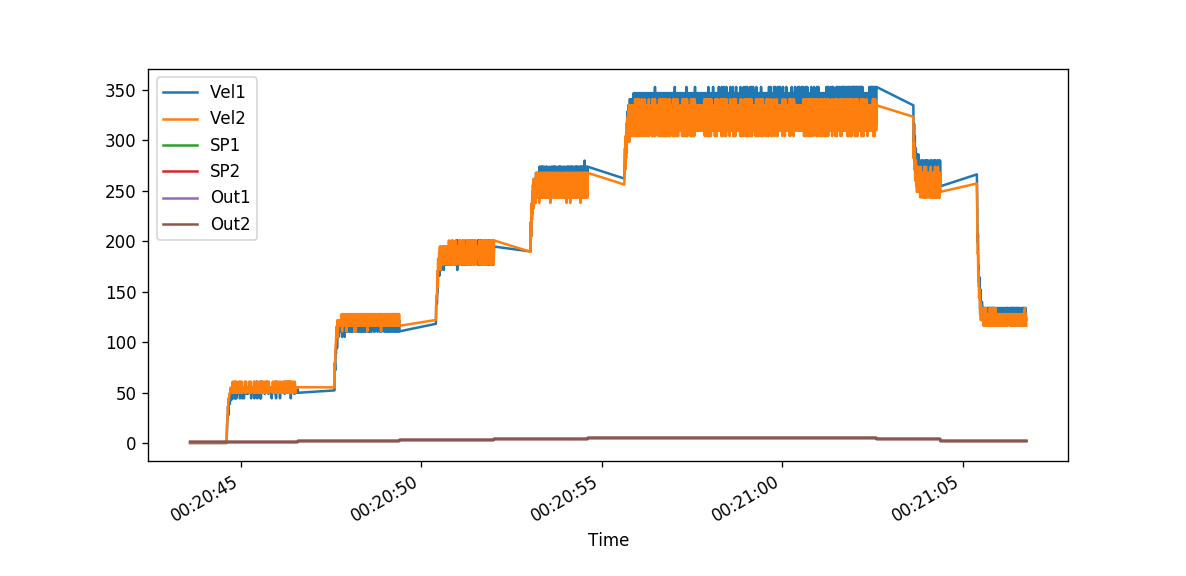

In [7]:
%matplotlib notebook
raw_data.plot()

In [8]:
print('\nFirst step steady state, median filter')
print(raw_data[50:100].median())
print('\nSecond step steady state, median filter')
print(raw_data[300:500].median())
#raw_data.keys()


First step steady state, median filter
Vel1    54.77
Vel2    54.77
SP1      1.00
SP2      1.00
Out1     1.00
Out2     1.00
dtype: float64

Second step steady state, median filter
Vel1    177.02
Vel2    177.02
SP1       3.00
SP2       3.00
Out1      3.00
Out2      3.00
dtype: float64
